<a href="https://colab.research.google.com/github/sepideh2020/Detection/blob/master/modelPattern_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas
import pandas as pd
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['l2-benign.csv','l2-malicious.csv']))
# Joining two datasets
df.to_csv('DNS.csv')

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import  numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64 and str)

#Dropping constant features
df=pd.read_csv('DNS.csv')
clean_dataset(df)
X=df.drop(labels=['Unnamed: 0','Label','SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp'], axis=1)
y=df['Label']

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Unnamed: 0','Label','SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp'], axis=1),
    df['Label'],
    test_size=0.3,
    random_state=0)
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
X_train.drop(constant_columns,axis=1)



,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
142276,25.105207,1121,44.652091,3568,142.121911,193437.324100,439.815102,246.789474,68.0,68,...,1.314122,0.760964,0.355508,0.596245,0.398668,0.016146,0.000014,1.924656,0.668608,1.495592
220274,14.552734,134739,9258.672632,77356,5315.564759,8609.226577,92.785918,133.141871,107.0,68,...,1.740672,0.574491,0.000002,0.001440,0.000481,0.000035,0.000028,0.929926,0.314835,2.991534
208932,33.264388,1807,54.322358,4897,147.214493,141596.848889,376.293567,223.466667,76.0,68,...,0.608612,1.643083,0.000068,0.008229,0.011261,0.015313,0.000048,-1.477259,1.362559,0.730785
124595,33.671056,1807,53.666271,4897,145.436484,141596.848889,376.293567,223.466667,76.0,68,...,0.611023,1.636599,0.000052,0.007189,0.010299,0.015284,0.000029,-2.080431,1.428593,0.698018
152628,0.439162,1085,2470.614489,4101,9338.239647,215287.418283,463.990752,272.947368,68.0,68,...,1.218265,0.820839,0.000099,0.009937,0.009531,0.007820,0.000003,0.516457,0.958863,1.042573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211809,67.723911,609,8.992393,472,6.969473,114.477509,10.699416,63.588235,62.0,56,...,2.220973,0.450253,50.592887,7.112868,10.059140,15.088340,0.000007,-2.121170,1.414216,0.707105
86438,33.504353,1806,53.903444,4828,144.100678,145522.872771,381.474603,228.758621,76.0,68,...,0.624495,1.601295,0.000055,0.007438,0.010544,0.015108,0.000031,-1.840681,1.413461,0.705403
122759,36.575283,16040,438.547529,22742,621.786030,22544.078675,150.146857,158.942623,165.0,68,...,0.646301,1.547267,0.000402,0.020049,0.018228,0.015352,0.000024,0.430332,0.907986,1.099888
152531,120.008394,318641,2655.155939,651098,5425.437157,6445.158078,80.281742,125.273091,107.0,68,...,0.565405,0.570140,0.000107,0.010352,0.011686,0.015286,0.015291,-1.043159,-0.348203,0.885852


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.15017474, 0.18963304, 0.1244311 , 0.19340893, 0.12102136,
       0.17495739, 0.1749739 , 0.1758262 , 0.25638073, 0.30050565,
       0.15431559, 0.15396287, 0.17127175, 0.14082194, 0.14076301,
       0.13441927, 0.11489053, 0.00858776, 0.12682643, 0.12043026,
       0.12157299, 0.07451234, 0.08481108, 0.08663314, 0.07162045,
       0.05965817, 0.07125335, 0.07725429, 0.06919286])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

PacketLengthMode                          0.300506
PacketLengthMedian                        0.256381
FlowBytesReceived                         0.193409
FlowBytesSent                             0.189633
PacketLengthMean                          0.175826
PacketLengthStandardDeviation             0.174974
PacketLengthVariance                      0.174957
PacketLengthCoefficientofVariation        0.171272
PacketLengthSkewFromMedian                0.154316
PacketLengthSkewFromMode                  0.153963
Duration                                  0.150175
PacketTimeVariance                        0.140822
PacketTimeStandardDeviation               0.140763
PacketTimeMean                            0.134419
PacketTimeSkewFromMedian                  0.126826
FlowSentRate                              0.124431
PacketTimeCoefficientofVariation          0.121573
FlowReceivedRate                          0.121021
PacketTimeSkewFromMode                    0.120430
PacketTimeMedian               

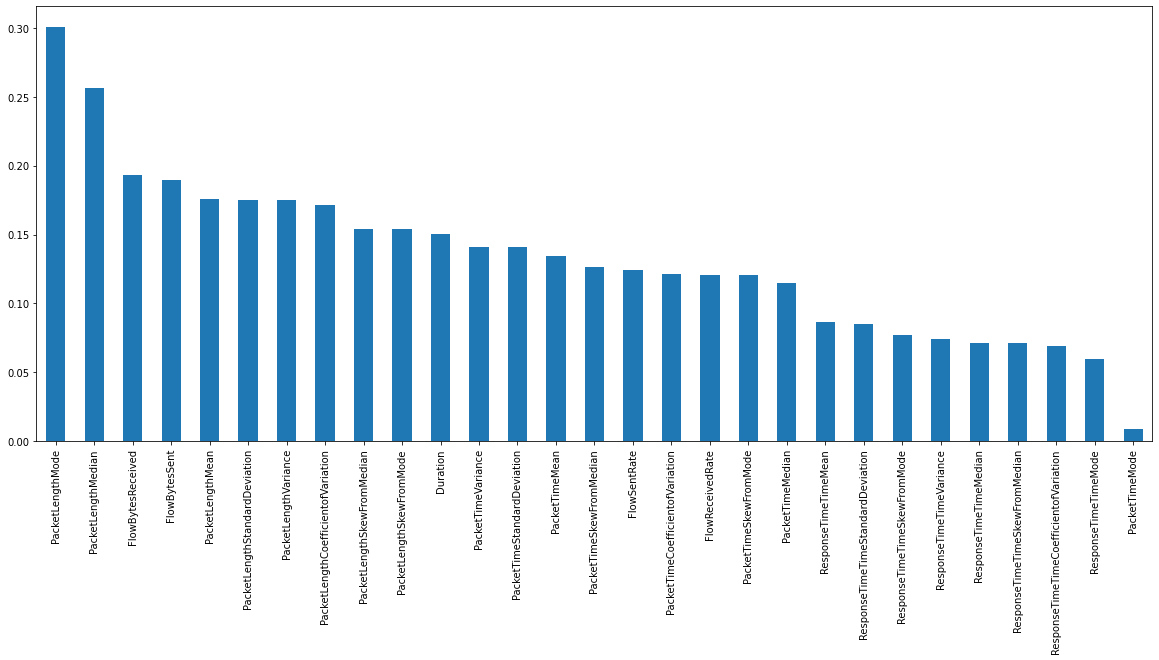

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
five_best_features=X_train.columns[sel_five_cols.get_support()]
print(five_best_features)


Index(['FlowBytesSent', 'FlowBytesReceived', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode'],
      dtype='object')


In [ ]:
import pandas as pd
data=pd.read_csv("l2-benign.csv")

#Benign training
benign_training_data=data[0:int(0.6*len(data))]
benign_training_data.to_csv('benign_training.csv', index=False)

#Benign valiation
benign_valiation_data=data[int(0.6*len(data)):int(0.8*len(data))]
benign_valiation_data.to_csv('benign_validation.csv', index=False)

#benign testing

benign_testing_data=data[int(0.8*len(data)):len(data)]
benign_testing_data.to_csv('benign_testing.csv',index=False)

data=pd.read_csv("l2-malicious.csv")
#Malicious training
Malicious_training_data=data[0:int(0.6*len(data))]
Malicious_training_data.to_csv('malicious_training.csv', index=False)

#Malicious valiation
Malicious_validation_data=data[int(0.6*len(data)):int(0.8*len(data))]
Malicious_validation_data.to_csv('malicious_validation.csv', index=False)

#Malicious testing
Malicious_testing_data=data[int(0.8*len(data)):len(data)]
Malicious_testing_data.to_csv('malicious_testing.csv',index=False)

In [ ]:
import pandas as pd

df=pd.read_csv('benign_training.csv',usecols =five_best_features)
df.to_csv('top_feature_benign_training.csv',index=None)

df=pd.read_csv('benign_validation.csv',usecols = five_best_features)
df.to_csv('top_feature_benign_validation.csv',index=None)

df=pd.read_csv('benign_testing.csv',usecols = five_best_features)
df.to_csv('top_feature_benign_testing.csv',index=None)

 #####################################################################################################################

df=pd.read_csv('malicious_training.csv',usecols = five_best_features)
df.to_csv('top_feature_malicious_training.csv',index=None)

df=pd.read_csv('malicious_validation.csv',usecols = five_best_features)
df.to_csv('top_feature_malicious_validation.csv',index=None)

df=pd.read_csv('malicious_testing.csv',usecols = five_best_features)
df.to_csv('top_feature_malicious_testing.csv',index=None)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import drive

# df=pd.read_csv('top_feature_benign_training.csv')
# for i in range(0,5):
#     for j in range(0,5):
#         plt.scatter(x=df.iloc[:, i],y=df.iloc[:, j])
#         plt.xlabel(df.columns[i], fontsize=18)
#         plt.ylabel(df.columns[j], fontsize=16)
#         plt.show()

import plotly.express as px
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64 and str)
df = pd.read_csv('top_feature_benign_training.csv')

clean_dataset(df)
fig = px.scatter_matrix(df)
   
fig.update_layout(
    width=1000,
    height=1000,
    title="Scatter matrix of Benign DNS dataset")
    

fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df=pd.read_csv('top_feature_benign_training.csv')
# for i in range(0,5):
#     for j in range(0,5):
#         plt.scatter(x=df.iloc[:, i],y=df.iloc[:, j])
#         plt.xlabel(df.columns[i], fontsize=18)
#         plt.ylabel(df.columns[j], fontsize=16)
#         plt.show()

import plotly.express as px

df = pd.read_csv('top_feature_benign_training.csv')


fig = px.scatter_matrix(np.log(df))
   
fig.update_layout(
    width=1000,
    height=1000,
    title="Scatter matrix of Benign DNS dataset")
    

fig.show()

In [ ]:
#linear regression benign #without normalization
#dependent : FlowBytesSent
from sklearn import linear_model
import statsmodels.api as sm 


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64 and str)
df = pd.read_csv('top_feature_benign_training.csv')

clean_dataset(df)

# df_log_train=np.log(df)
X_train=df[['FlowBytesReceived', 'PacketLengthMean','PacketLengthMedian', 'PacketLengthMode']]
y_train=df['FlowBytesSent']
# fit the model 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -5031.845591171432
Coefficients: 
 [  0.68132212  -6.0286074   90.78568803 -24.87466651]
                                 OLS Regression Results                                
Dep. Variable:          FlowBytesSent   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                          2.155e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                        0.00
Time:                        00:25:52   Log-Likelihood:                     -1.2467e+05
No. Observations:               11884   AIC:                                  2.493e+05
Df Residuals:                   11880   BIC:                                  2.494e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
df_validation=pd.read_csv('benign_validation.csv')
X_valiation=df_validation[['FlowBytesReceived', 'PacketLengthMean','PacketLengthMedian', 'PacketLengthMode']]
y_valiation=df_validation['FlowBytesSent']
y_pred_regr= regr.predict(X_valiation)
print("Prediction for test set: {}".format(y_pred_regr))
regr_diff = pd.DataFrame({'Actual value': y_valiation, 'Predicted value': y_pred_regr})
regr_diff.head()
predicted_value=0
real_value=0
for i in range(len(regr_diff)):
  predicted_value+=y_pred_regr[i]
  real_value+=y_valiation[i]
standard_error= (predicted_value-real_value)/len(regr_diff)
print('Standard error is {}'.format(standard_error))

Prediction for test set: [  213.10931141 -1227.18161116  1548.03072843 ...  -509.93839338
 73099.17923393 -1052.97211716]
Standard error is -1710.7268085846736


In [ ]:
# #linear regression benign #after Normalization
# #dependent : FlowBytesSent
# from sklearn import linear_model
# import statsmodels.api as sm 


# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64 and str)
# df = pd.read_csv('top_feature_benign_training.csv')
# clean_dataset(df)
# df_log_train=np.log(df)

# X_train=df_log_train[['FlowBytesReceived', 'PacketLengthMean','PacketLengthMedian', 'PacketLengthMode']]
# X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# y_train=df_log_train['FlowBytesSent']
# # fit the model 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(X_train, y_train)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# # with statsmodels
# x = sm.add_constant(X_train) # adding a constant
 
# model = sm.OLS(y_train, X_train).fit()
# predictions = model.predict(X_train) 
 
# print_model = model.summary()
# print(print_model)

Intercept: 
 -0.10067680661811185
Coefficients: 
 [ 0.92584938 -0.6572672   0.63831287  0.20061481]
                                 OLS Regression Results                                
Dep. Variable:          FlowBytesSent   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.066e+06
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                        0.00
Time:                        00:26:02   Log-Likelihood:                         -1395.6
No. Observations:               11884   AIC:                                      2799.
Df Residuals:                   11880   BIC:                                      2829.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64 and str)

# df_validation=pd.read_csv('top_feature_benign_validation.csv')
# clean_dataset(df_validation)
# df_log_validation_log=np.log(df_validation)
# X_valiation_log=df_log_validation_log[['FlowBytesReceived', 'PacketLengthMean','PacketLengthMedian', 'PacketLengthMode']]
# X_valiation_log= X_valiation_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# y_valiation_log=df_log_validation_log['FlowBytesSent']
# y_valiation_log= y_valiation_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# y_pred_regr_log= regr.predict(X_valiation_log)
# print("Prediction for valiation set: {}".format(y_pred_regr_log))
# regr_diff_log = pd.DataFrame({'Actual value': y_valiation_log, 'Predicted value': y_pred_regr_log})
# regr_diff_log .head()
# predicted_value_log=0
# real_value_log=0
# for i in range(len(regr_diff_log)):
#   predicted_value_log+=y_pred_regr_log[i]
#   real_value_log+=y_valiation_log[i]
# standard_error_log= (predicted_value_log-real_value_log)/len(regr_diff_log)
# print('Standard error is {}'.format(standard_error_log))

Prediction for valiation set: [ 6.59653893  4.50447998  6.87584986 ...  4.72817012 11.12643045
  5.08412073]
Standard error is -0.023066656480958594


In [ ]:
#Finding best model in malware and benign data
sel_five_cols
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64 and str)
df = pd.read_csv('top_feature_benign_training.csv')
clean_dataset(df)
df_log_train=np.log(df)

df_validation=pd.read_csv('top_feature_benign_validation.csv')
clean_dataset(df_validation)
df_log_validation_log=np.log(df_validation)

import pandas as pd
All_standard_err=[]
for feature in five_best_features:
  index=five_best_features.get_loc(feature)
  X_train=df_log_train[:index]+ df_log_train[index+1:]
  X_train = X_train.replace((np.inf, -np.inf, np.nan), 0)
  y_train=df_log_train[feature]
  y_train = y_train.replace((np.inf, -np.inf, np.nan), 0)
  # print(y_train)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)

  # print('Intercept: \n', regr.intercept_)
  # print('Coefficients: \n', regr.coef_)

  # # with statsmodels
  # x = sm.add_constant(X_train) # adding a constant
  
  # model = sm.OLS(y_train, X_train).fit()
  # predictions = model.predict(X_train) 


  # X_valiation_log=df_log_validation_log[:index]+df_log_train[index+1:]
  # X_valiation_log= X_valiation_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  # y_valiation_log=df_log_validation_log[index]
  # y_valiation_log= y_valiation_log.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
  # y_pred_regr_log= regr.predict(X_valiation_log)
  # print("Prediction for valiation set: {}".format(y_pred_regr_log))
  # regr_diff_log = pd.DataFrame({'Actual value': y_valiation_log, 'Predicted value': y_pred_regr_log})
  # regr_diff_log .head()
  # predicted_value_log=0
  # real_value_log=0
  # for i in range(len(regr_diff_log)):
  #   predicted_value_log+=y_pred_regr_log[i]
  #   real_value_log+=y_valiation_log[i]
  # standard_error_log= (predicted_value_log-real_value_log)/len(regr_diff_log)
  # print('Standard error is {}'.format(standard_error_log))
  # All_standard_err.append(standard_error)


ValueError: ignored